<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-чтение-файла-с-данными" data-toc-modified-id="Загрузка-и-чтение-файла-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и чтение файла с данными</a></span></li><li><span><a href="#Лемматизация-и-очистка-текстовых-данных" data-toc-modified-id="Лемматизация-и-очистка-текстовых-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация и очистка текстовых данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков-и-целевых-показателей" data-toc-modified-id="Подготовка-признаков-и-целевых-показателей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка признаков и целевых показателей</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span></li><li><span><a href="#Обучение-модели-LGBMClassifier" data-toc-modified-id="Обучение-модели-LGBMClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение модели LGBMClassifier</a></span></li><li><span><a href="#Обучение-модели-Случайый-лес" data-toc-modified-id="Обучение-модели-Случайый-лес-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение модели Случайый лес</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Для решения задачи нами будет обучено три модели: Логистическая регрессия, модель случайного леса и LGBMCkassifiere. едйствовать будем по следующему алгоритму:**
- сначла мы импортируем данные, изучим их, проверим сбалансированность классов, проведем очистку текстов от символов и с лишних пробелов. 
- Затем проведем векторизацию текстов с помощью метода TF-IDF и разделим выборку на обучающую и тестовую.
- После всех этих действий мы обучим три различные модели и при помощи кросс-валидации проверим качество моделей с помощью метрики F1.

**По условию значение метрики f1 на тестовой выборке должно быть не менее 0,75. Выберем модель с наилучшим показателем данной метрики на обучающей выборке и проверим ее работу на тестовой, если условие будет выполнено, данная модель будет предложена коиенту как модель для внедрения**

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk import pos_tag
from tqdm.notebook import tqdm
tqdm.pandas()
from nltk.probability import FreqDist
from sklearn.pipeline import Pipeline

### Загрузка и чтение файла с данными

In [ ]:
df = pd.read_csv('toxic_comments.csv', index_col=0)

In [2]:
from google.colab import drive
import pandas as pd

# Подключение Google Drive как локальный диск
drive.mount('/content/drive')

# Путь к файлу на Google Drive
path = '/content/drive/My Drive/toxic_comments.csv'

# Чтение файла с помощью pandas
df = pd.read_csv(path, index_col=0)

Mounted at /content/drive


In [3]:
df.sample(5)

,text,toxic
3630,"""\n\n Talk:Gaza flotilla clash \n\nApologies: ...",0
70420,"Thankfully, no. \n\nI think it's just a random...",0
33331,"Here's another source:\nThe Story of The Sun, ...",0
154673,cutie in the house \n\ncutie in the house hala,0
68923,"Well, do you think Mibhorovovovsky missed the ...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


Пропущенных значений нет, данные можно использовать в таком виде

In [5]:
# Проверим целевой признак на сбаллансировасть классов
df['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

Видим сильный дисбаланс в сторону одного из классов, для обучения моделей применим к тренировочной выборке метод апсемплинга чтобы уравновесить классы

### Лемматизация и очистка текстовых данных

In [6]:
# Напишем функции которые приведут исходные текстовые данные к виду необходимому для обучения моделей
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(word):
    
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def text_prepare(text):
    text = text.lower()
    text = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()]
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

df['text'] = df['text'].progress_apply(text_prepare)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


  0%|          | 0/159292 [00:00<?, ?it/s]

In [ ]:
#nlp = spacy.load("en_core_web_sm")

#def text_prepare(text):
    #doc = nlp(text)
    #lemmas = [token.lemma_ for token in doc if not token.is_stop]
    #return ' '.join(lemmas)

#df['text'] = df['text'].apply(text_prepare)

In [7]:
#очистим текст от знаков препинания и лишних пробелов
def clear_text(text):
    x = re.sub(r'[^a-zA-Я]', ' ', text)
    return ' '.join(x.split())

df['text'] = df['text'].progress_apply(clear_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [8]:
# Проверим результат нашей работы
df.sample(5)

,text,toxic
11440,red link fine please read wp redlink rest assu...,0
19975,didnt anything wrong first place you accuse so...,1
115162,well suck ball gay fuck wikipedia censored giv...,1
59445,contact e mail mfisher gmail com space page ht...,0
122929,velikovsky history astromony inaccurate please...,0


**Мы провели импорт библиотек которые нам понадобятся, загрузили файл с данными и изучили их, обнаружили сильный дисбалланс классов, провели очистку текста от символов и лишних пробелов и провели лемматизацию слов, теперь можно приступать к подготовке данных для обучения моделей**

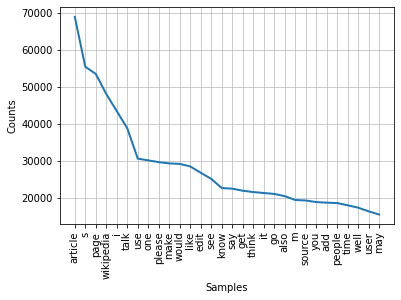

In [9]:
text = ' '.join(df['text'].tolist())
words_in_text = text.split()
fdist = FreqDist(words_in_text)
fdist.plot(30,cumulative=False);

In [10]:
!/opt/conda/bin/python -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt




/bin/bash: /opt/conda/bin/python: No such file or directory


In [11]:
from nltk.corpus import stopwords
stop_words_plot = list(stopwords.words('english'))

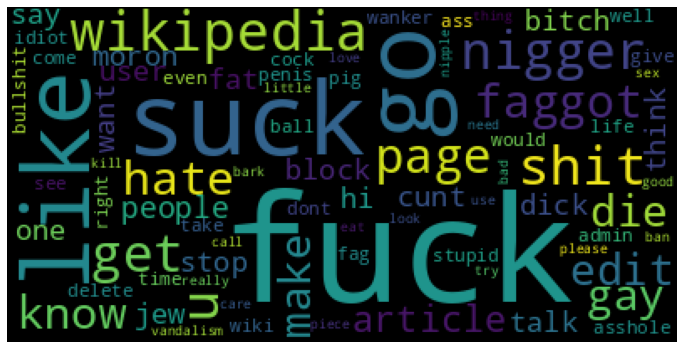

In [12]:
df_negative = df[df['toxic'] == 1]
text_cloud = ' '.join(df_negative['text'])
cloud = WordCloud(stopwords=stop_words_plot, max_words=80, collocations=False).generate(text_cloud)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()   

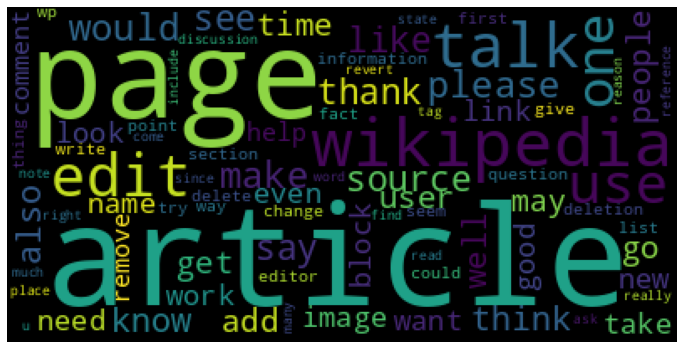

In [13]:
df_positiv = df[df['toxic'] == 0]
text_cloud = ' '.join(df_positiv['text'])
cloud = WordCloud(stopwords=stop_words_plot, max_words=80, collocations=False).generate(text_cloud)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()   

## Обучение

### Подготовка признаков и целевых показателей

In [14]:
# разобъем данные на тренировочную и тестовую выборки
features_train, features_test, target_train, target_test = (
    train_test_split(df['text'], df['toxic'], test_size=0.2, random_state=12345, stratify=df['toxic'])
)



### Обучение модели линейной регрессии

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_plot)),
    ('lr', LogisticRegression(class_weight='balanced'))
])

parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'lr__C': [0.1, 1, 10, 100]
}

grid_search_lr = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1, scoring='f1')

grid_search_lr.fit(features_train, target_train)

best_model_lr = grid_search_lr.best_estimator_

print("Лучшие параметры модели : ", grid_search_lr.best_params_)
print("Лучший показатель F1: ", grid_search_lr.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры модели :  {'lr__C': 100, 'tfidf__ngram_range': (1, 2)}
Лучший показатель F1:  0.782951727476279


### Обучение модели LGBMClassifier

In [15]:
#обучим модель LGBMClassifier с параметрами по умолчанию
model_lgbm = LGBMClassifier()
#model_lgbm.fit(features_train_upsampled, target_train_upsampled)

In [16]:
%%time
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_plot)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=12345))
])

CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 148 µs


In [17]:
%%time
parameters = {
    'lgbm__learning_rate': [0.1, 0.3, 0.5],
    'lgbm__num_leaves': [7, 15, 31],
    'lgbm__n_estimators': [50, 100, 200]
}

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [18]:
%%time
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2, scoring='f1')

CPU times: user 56 µs, sys: 3 µs, total: 59 µs
Wall time: 63.9 µs


In [19]:
%%time
grid_search.fit(features_train, target_train)
print("Лучшие параметры модели : ", grid_search.best_params_)
print("Лучший показатель F1: ", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Лучшие параметры модели :  {'lgbm__learning_rate': 0.3, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 31}
Лучший показатель F1:  0.7439905132848107
CPU times: user 5min 15s, sys: 6.2 s, total: 5min 21s
Wall time: 1h 1min 3s


### Обучение модели Случайый лес

In [ ]:
# обучим модель случайного леса с количеством деревьев 100 и глубиной ветвления 10
model_rf = model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=12345)
model_rf.fit(features_train_upsampled, target_train_upsampled)

In [ ]:
scoring = 'f1'
scores = cross_val_score(model_rf, features_train_upsampled, target_train_upsampled, cv=5, scoring=scoring)
print(f'Среднее значение F1 модели Случайный лес: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Соберем полученные метрики в таблицу для наглядности

In [ ]:
results = {
    'Модели' : ['LightGBM', 'RandomForest', 'Линейная регрессия'],
    'Среднее F1 на тенировочной' :pd.Series([0.897, 0.802, 0.783]),
    }
display(pd.DataFrame(results))

**По итогам обучения моделей и проверки их показателей на тренировочной выборке с помощью кросс-валидации наилучшее f1 у модели линейной регрессии, именно ее будем проверять на тестовой выборке. Показатель метрики F1 должен быть не менее 0,75**

## Выводы

**Проверим работу модели на тестовых данных**

In [22]:

f1_score_test = f1_score(target_test, best_model_lr.predict(features_test))
print(f'F1 Линейной регрессии на тестовой выборке: {f1_score_test:.3f}')

F1 Линейной регрессии на тестовой выборке: 0.790


***Отлично! результат получен!***

***Итак мы продедлали большую работу, загрузили и изучили данные, подготовили их для обучения моделей, обучили на лемматизированных и векторизованных данных 3 разные модели и выбрали из них модель с лучшим показателем, проверили ее работу на тестовой выборке. И теперь мы готовы предоставить клиенту нашу победительницу, это модель Линейной регрессии с показателем метрики F1 на тесте - 0,76. Задача выполнена, можно передавать в работу.***